In [52]:
import cv2
from ultralytics import YOLO
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [61]:
model = YOLO('model/best.pt')

video_path = "multiple_rgby_01.mp4"
cap = cv2.VideoCapture(video_path)

track_history = defaultdict(lambda: [])

while cap.isOpened():
    success, frame = cap.read()

    if success:
        results = model.track(frame, persist=True)

        if results[0].boxes.id != None:
            boxes = results[0].boxes.xywh.cpu()
            track_ids = results[0].boxes.id.int().cpu().tolist()

            annotated_frame = results[0].plot()

            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                track = track_history[track_id]
                track.append((float(x), float(y)))
                if len(track) > 30:
                    track.pop(0)

                points = np.hstack(track).astype(np.int32).reshape((-1, 1, 2))
                cv2.polylines(annotated_frame, [points], isClosed=False, color=(230, 230, 230), thickness=8)

            cv2.imshow("YOLOv8 Tracking", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 165.8ms
Speed: 5.0ms preprocess, 165.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 184.9ms
Speed: 0.0ms preprocess, 184.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 169.2ms
Speed: 15.6ms preprocess, 169.2ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 184.9ms
Speed: 0.0ms preprocess, 184.9ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 162.7ms
Speed: 6.5ms preprocess, 162.7ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 red_cube, 1 blue_cube, 1 green_cube, 1 yellow_cube, 171.3ms
Speed: 15.6ms preprocess, 171.3ms inference, 8.0ms postprocess pe

In [59]:
first_data_list = []
second_data_list = []
first_data_list2 = []
second_data_list2 = []
for key, value in track_history.items() :
    track_data = value
    print(key, value)
    first_data = [round(t[0]-track_data[0][0], 2) for t in track_data]
    second_data = [round(t[1]-track_data[0][1], 2) for t in track_data]
    first_data_list.append(first_data)
    second_data_list.append(second_data)
    first_data_list2.append(zscore(first_data))
    second_data_list2.append(zscore(second_data))


1 [(761.4998779296875, 396.44573974609375), (760.1828002929688, 395.93963623046875), (759.9291381835938, 396.59478759765625), (760.7716674804688, 397.0301513671875), (760.5089721679688, 397.803466796875), (760.5464477539062, 398.9842224121094), (760.21337890625, 399.6463623046875), (759.4423828125, 400.8148193359375), (759.5592041015625, 400.4002990722656), (759.1187744140625, 399.8983154296875), (760.0523071289062, 399.44622802734375), (760.04833984375, 399.59912109375), (759.9931030273438, 399.54815673828125), (759.9352416992188, 399.48583984375), (759.8921508789062, 399.38232421875), (759.9155883789062, 399.3288879394531), (759.8612060546875, 399.32025146484375), (759.837158203125, 399.34051513671875), (759.8153686523438, 399.37249755859375), (759.89794921875, 399.4293212890625), (759.74560546875, 399.2132263183594), (759.6683349609375, 399.2760009765625), (759.6529541015625, 399.29937744140625), (759.734375, 399.58148193359375), (759.6673583984375, 399.41180419921875), (759.7277221

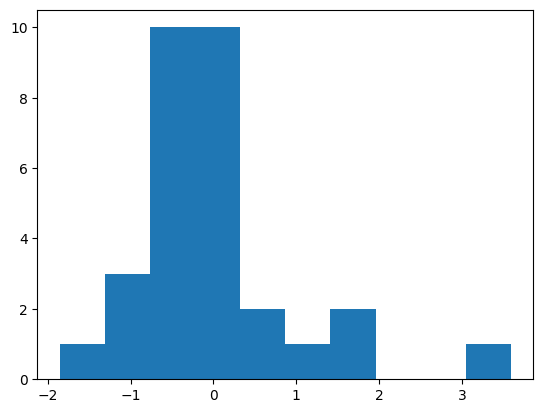

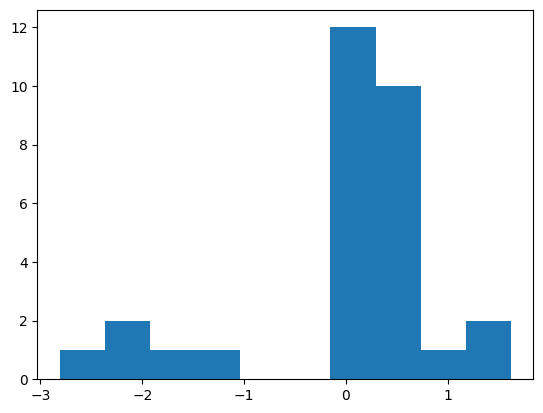

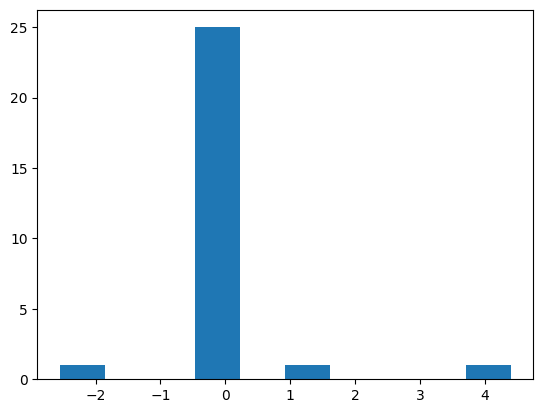

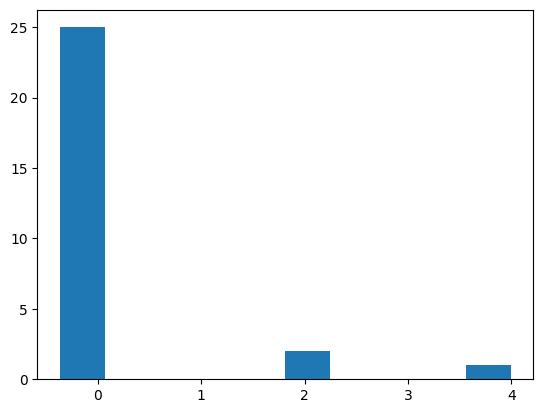

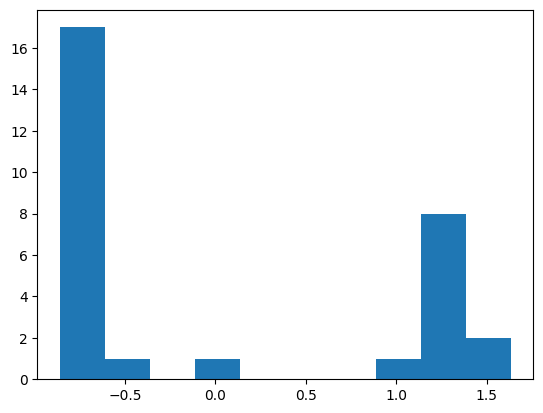

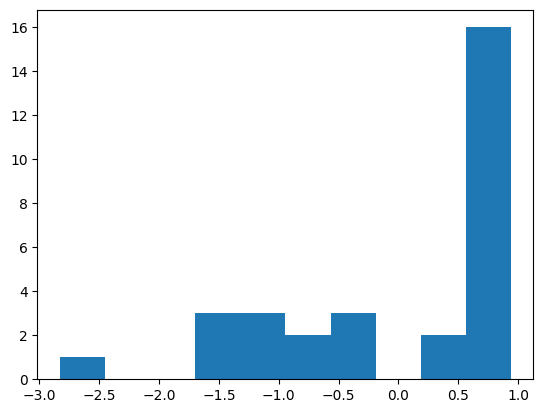

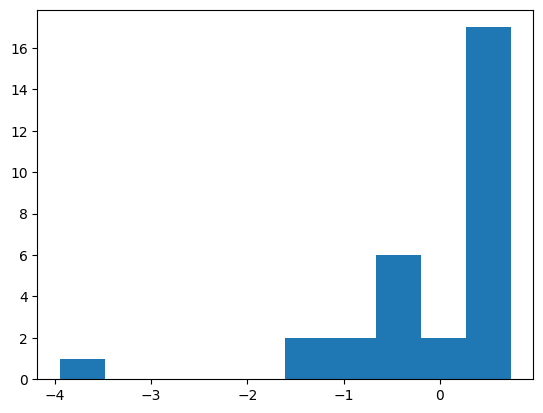

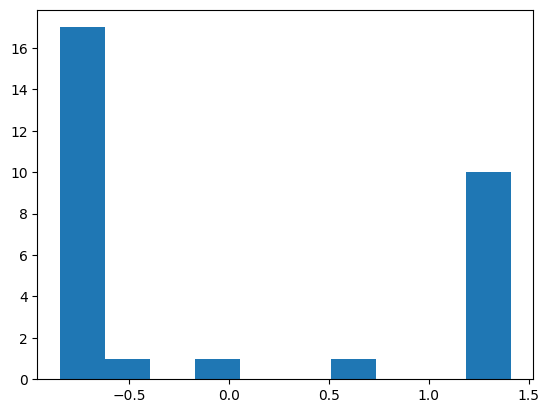

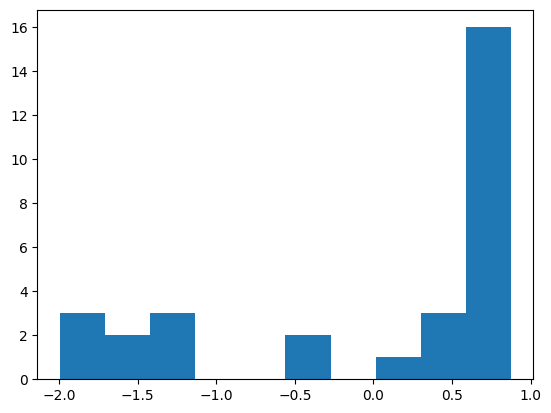

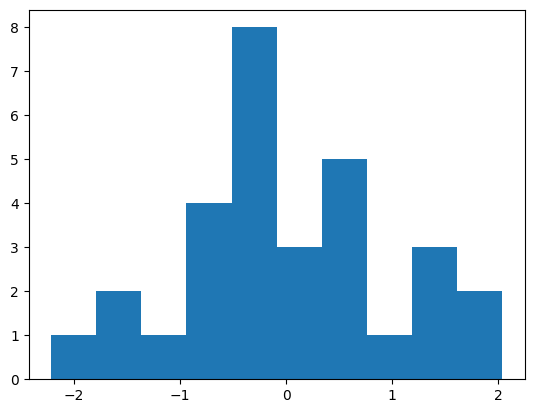

In [60]:
for i in range(len(first_data_list)):
    plt.hist(first_data_list2[i])
    plt.show()
    plt.hist(second_data_list2[i])
    plt.show()

    print("=================================================")